In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

## Weather

In [2]:
# read in
all_weather_data = pd.read_csv("Wetterdaten/20250624-0529_all_weather_data.csv")

In [3]:
# only visualize one week
all_weather_data = all_weather_data[(all_weather_data["MESS_DATUM"]>=202506160000) & (all_weather_data["MESS_DATUM"]<202506230000)]
all_weather_data["MESS_DATUM"] = all_weather_data["MESS_DATUM"].apply(lambda v: pd.to_datetime(str(v), format='%Y%m%d%H%M'))

timestamps = []
for date in all_weather_data["MESS_DATUM"].apply(lambda x: x.date()).unique():
    timestamps += [
        datetime.datetime(date.year, date.month, date.day),
        datetime.datetime(date.year, date.month, date.day, 12)
    ]
#timestamps

In [4]:
all_weather_data

,STATIONS_ID,MESS_DATUM,PP_10,TT_10,TM5_10,RF_10,TD_10,FF_10,DD_10
2490,2928,2025-06-16 00:00:00,1005.0,16.0,15.3,90.5,14.5,2.9,300
2491,2928,2025-06-16 00:10:00,1005.0,15.9,15.4,92.7,14.7,2.0,320
2492,2928,2025-06-16 00:20:00,1005.1,15.9,15.5,93.7,14.9,1.9,320
2493,2928,2025-06-16 00:30:00,1005.2,15.9,15.5,94.6,15.0,1.9,320
2494,2928,2025-06-16 00:40:00,1005.2,15.9,15.5,93.8,14.9,1.6,310
...,...,...,...,...,...,...,...,...,...
7279,2932,2025-06-22 23:10:00,994.2,23.2,22.3,43.7,10.2,4.9,180
7280,2932,2025-06-22 23:20:00,994.2,23.2,22.3,43.7,10.2,5.0,170
7281,2932,2025-06-22 23:30:00,994.1,23.4,22.5,42.4,9.9,5.4,180
7282,2932,2025-06-22 23:40:00,994.0,23.2,22.3,42.5,9.8,5.6,180


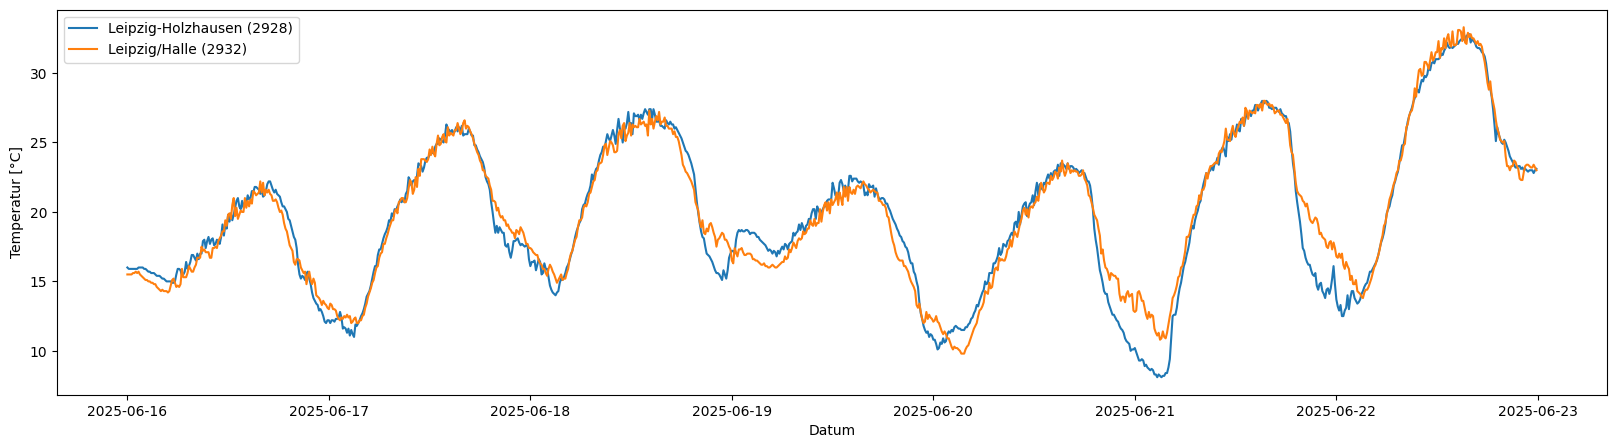

In [5]:
plt.figure(figsize=(20, 5))
for stations_id, stations_name in [(2928, "Leipzig-Holzhausen"), (2932, "Leipzig/Halle")]:
    plt.plot(all_weather_data["MESS_DATUM"].unique(), all_weather_data[all_weather_data["STATIONS_ID"]==stations_id]["TT_10"], label=f"{stations_name} ({stations_id})")
plt.xlabel("Datum")
plt.ylabel("Temperatur [°C]")
#plt.xticks([str(ts) for ts in timestamps], rotation=30)
plt.legend()
plt.savefig("presentation/250616-23_temperatur_diagramm.png", bbox_inches='tight')
plt.show()

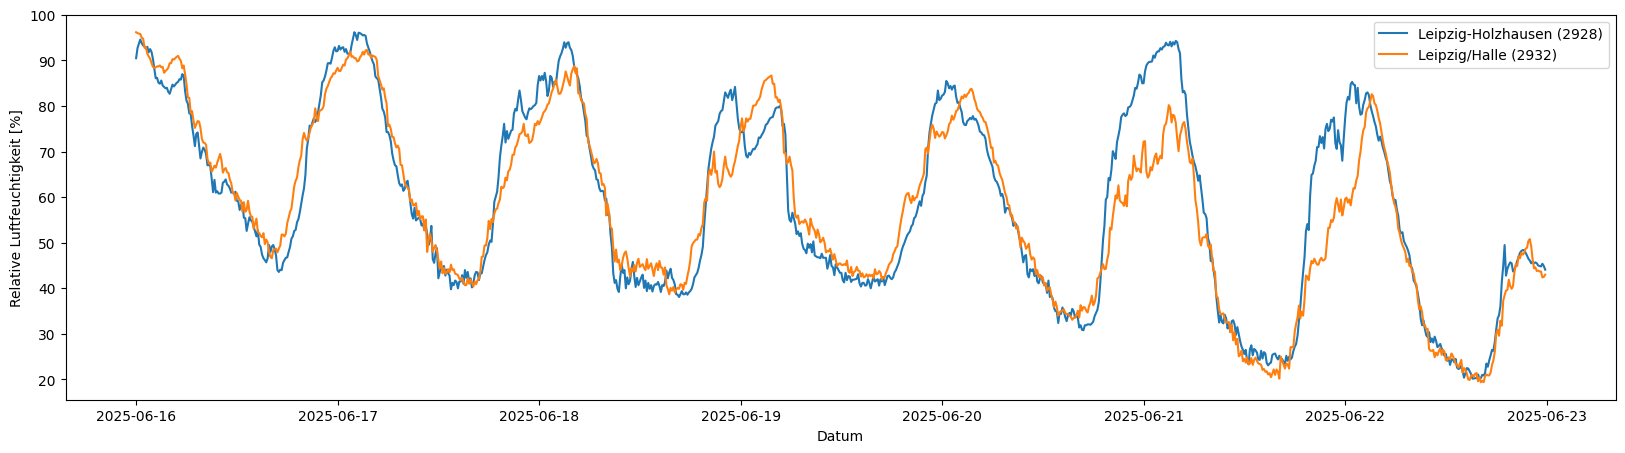

In [6]:
plt.figure(figsize=(20, 5))
for stations_id, stations_name in [(2928, "Leipzig-Holzhausen"), (2932, "Leipzig/Halle")]:
    plt.plot(all_weather_data["MESS_DATUM"].unique(), all_weather_data[all_weather_data["STATIONS_ID"]==stations_id]["RF_10"], label=f"{stations_name} ({stations_id})")
plt.xlabel("Datum")
plt.ylabel("Relative Luftfeuchtigkeit [%]")
plt.legend()
plt.savefig("presentation/250616-23_relative-humidity_diagramm.png", bbox_inches='tight')
plt.show()

# in der Nacht immer relativ hoch

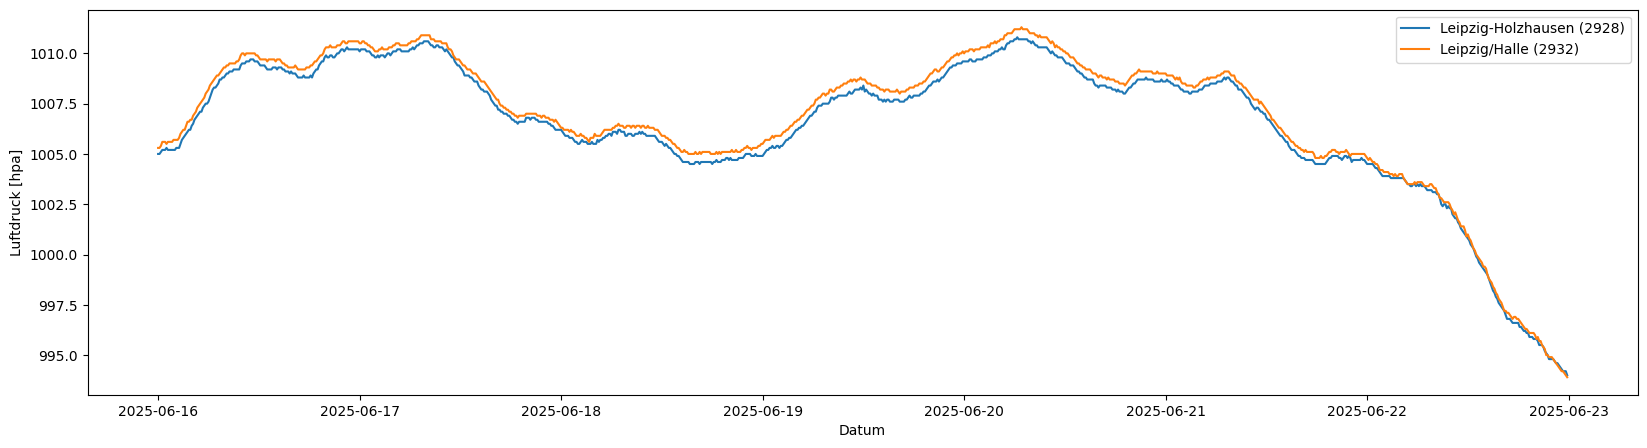

In [7]:
plt.figure(figsize=(20, 5))
for stations_id, stations_name in [(2928, "Leipzig-Holzhausen"), (2932, "Leipzig/Halle")]:
    plt.plot(all_weather_data["MESS_DATUM"].unique(), all_weather_data[all_weather_data["STATIONS_ID"]==stations_id]["PP_10"], label=f"{stations_name} ({stations_id})")
plt.xlabel("Datum")
plt.ylabel("Luftdruck [hpa]")
plt.legend()
plt.savefig("presentation/250616-23_pressure_diagramm.png", bbox_inches='tight')
plt.show()

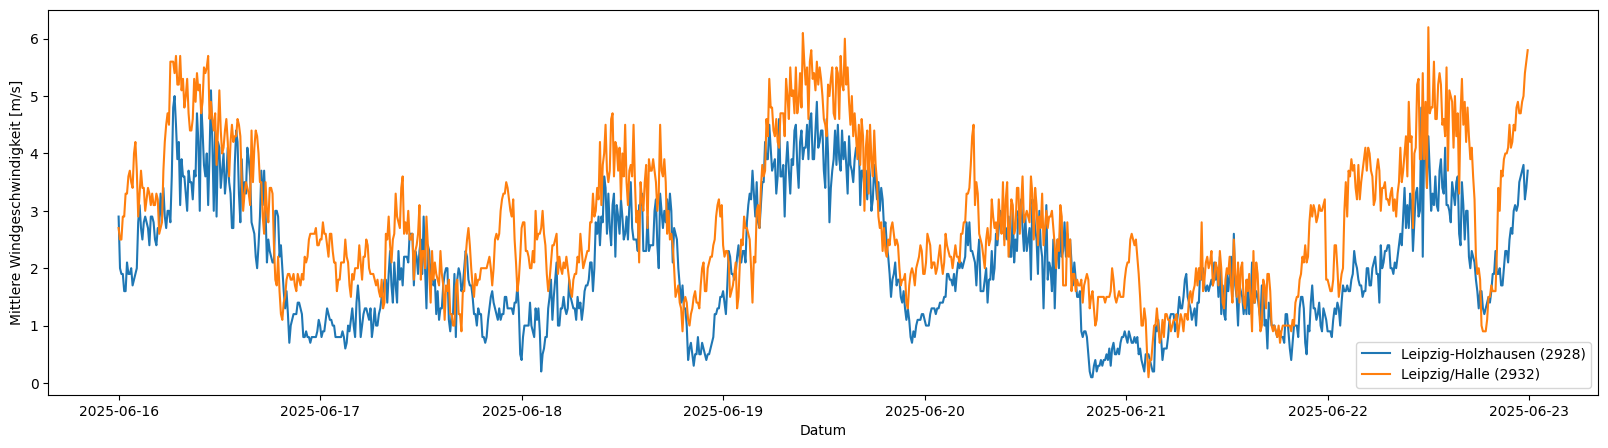

In [8]:
plt.figure(figsize=(20, 5))
for stations_id, stations_name in [(2928, "Leipzig-Holzhausen"), (2932, "Leipzig/Halle")]:
    plt.plot(all_weather_data["MESS_DATUM"].unique(), all_weather_data[all_weather_data["STATIONS_ID"]==stations_id]["FF_10"], label=f"{stations_name} ({stations_id})")
plt.xlabel("Datum")
plt.ylabel("Mittlere Windgeschwindigkeit [m/s]")
plt.legend()
plt.savefig("presentation/250616-23_wind-speed_diagramm.png", bbox_inches='tight')
plt.show()

## Bike Counting Stations

In [9]:
# read in
all_bike_counting_data = pd.read_csv("Bikedaten/20250624-0529_bike_counting_data.csv")
all_bike_counting_data = all_bike_counting_data[(all_bike_counting_data["counttime"]>="2025-06-16T00:00:00") & (all_bike_counting_data["counttime"]<"2025-06-23T00:00:00")]
all_bike_counting_data["counttime"] = all_bike_counting_data["counttime"].apply(lambda v: pd.to_datetime(str(v), format='%Y-%m-%dT%H:%M:%S'))

In [10]:
all_bike_counting_data

,Unnamed: 0,stationname,counttime,count,Shape
415,415,Manetstraße,2025-06-16 00:00:00,6.0,POINT (316626.38460000 5690467.49090000)
416,416,Manetstraße,2025-06-16 01:00:00,1.0,POINT (316626.38460000 5690467.49090000)
417,417,Manetstraße,2025-06-16 02:00:00,0.0,POINT (316626.38460000 5690467.49090000)
418,418,Manetstraße,2025-06-16 03:00:00,2.0,POINT (316626.38460000 5690467.49090000)
419,419,Manetstraße,2025-06-16 04:00:00,5.0,POINT (316626.38460000 5690467.49090000)
...,...,...,...,...,...
9059,9059,Grimmaischer Steinweg stadteinwärts,2025-06-22 19:00:00,87.0,POINT (317732.03250000 5690731.39220000)
9060,9060,Grimmaischer Steinweg stadteinwärts,2025-06-22 20:00:00,97.0,POINT (317732.03250000 5690731.39220000)
9061,9061,Grimmaischer Steinweg stadteinwärts,2025-06-22 21:00:00,66.0,POINT (317732.03250000 5690731.39220000)
9062,9062,Grimmaischer Steinweg stadteinwärts,2025-06-22 22:00:00,52.0,POINT (317732.03250000 5690731.39220000)


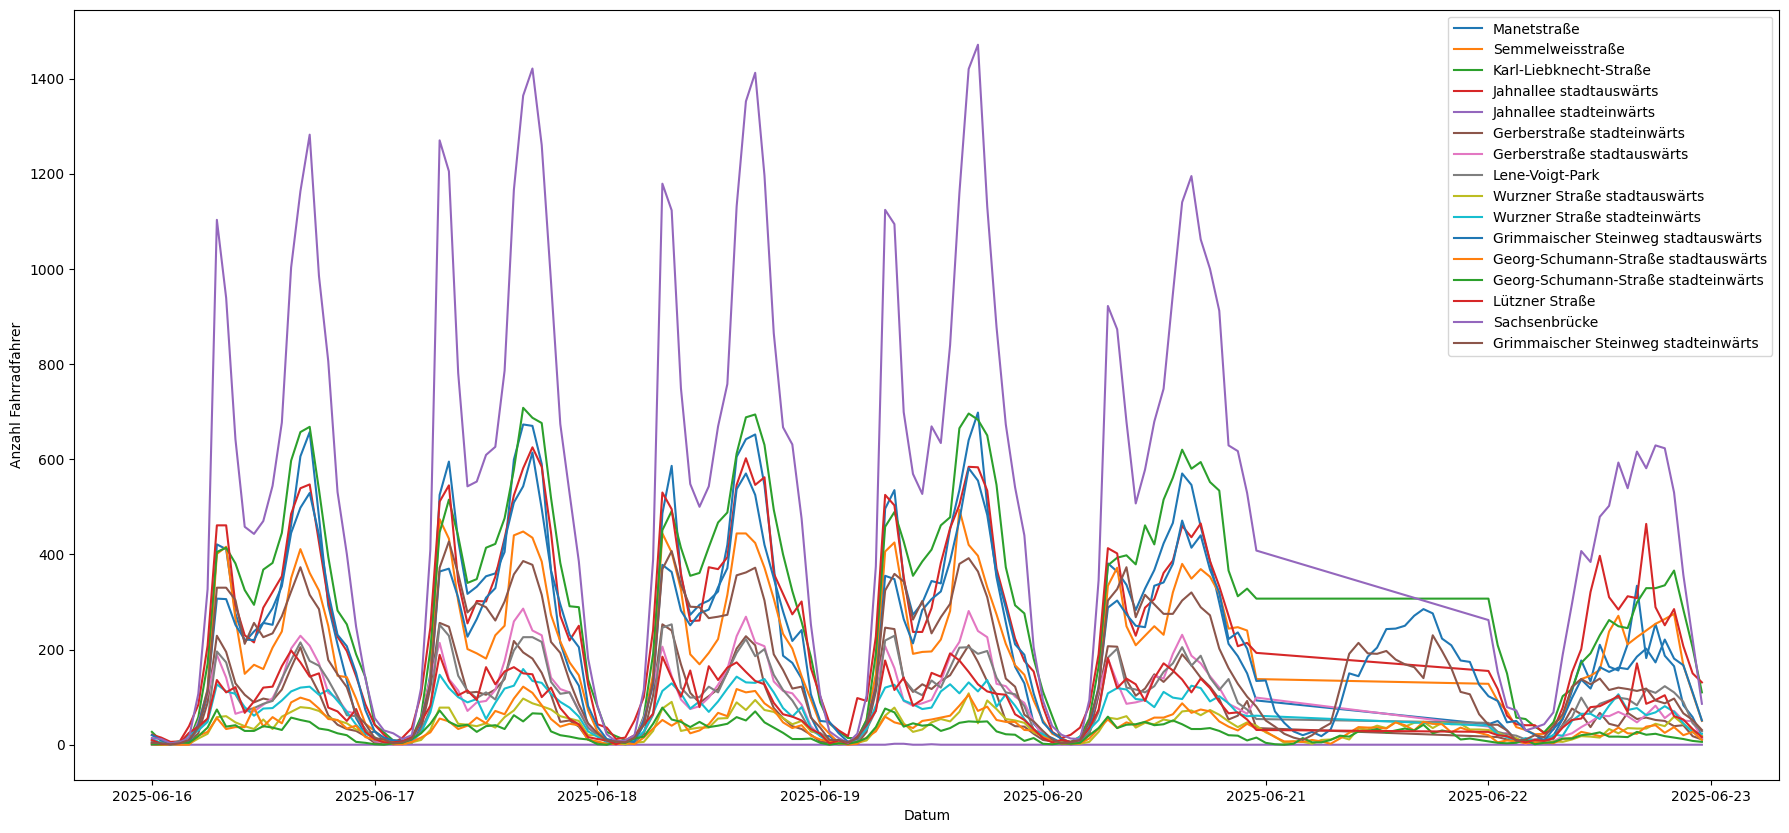

In [11]:
plt.figure(figsize=(22,10))
for stationname in all_bike_counting_data["stationname"].unique():
    tmp_df = all_bike_counting_data[all_bike_counting_data["stationname"]==stationname]
    plt.plot(
        tmp_df["counttime"],
        tmp_df["count"],
        label = stationname
    )
plt.xlabel("Datum")
plt.ylabel("Anzahl Fahrradfahrer")
plt.legend()
plt.savefig("presentation/250616-23_bike_counting_stations.png", bbox_inches='tight')
plt.show()